In [15]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('clean_review.csv')

In [18]:
df.head()

,business_id,cool,date,funny,stars,useful,review_length,clean_text
0,JlNeaOymdVbE6_bubqjohg,0,2014-08-09,0,1,3,81,chevo chandler delicious ahwatukee different r...
1,0Rni7ocMC_Lg2UH0lDeKMQ,0,2014-08-09,0,1,6,21,place dirty grimy twice service horrible
2,S-oLPRdhlyL5HAknBKTUcQ,0,2017-11-30,0,4,0,25,holy portion size lot bang buck service super ...
3,iIjVO7cLD1UEmIO7G05Ujw,0,2016-06-11,0,4,0,60,flavor actually pretty good eat menudo tortill...
4,1JF9TbJ2d5hH8xsQvvklHg,0,2016-06-18,0,5,1,94,place great flavor thing ask bring chip salsa ...


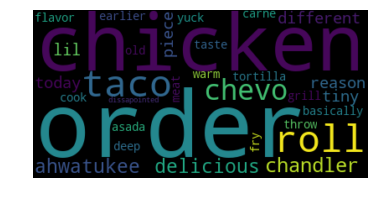

In [19]:
# Start with one review:
text = df['clean_text'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

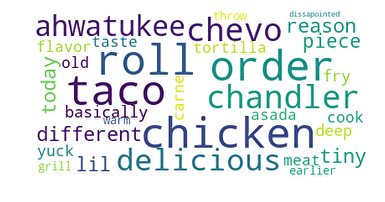

In [26]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='sinc')
plt.axis("off")
plt.show()

In [23]:
# Save the image in the img folder:
wordcloud.to_file('first_review.png')

In [30]:
text = " ".join(str(review) for review in df['clean_text'].head(1000))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 360959 words in the combination of all review.


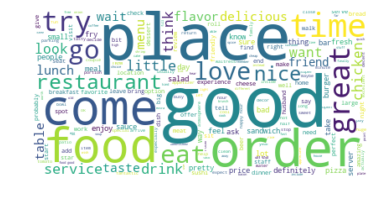

In [31]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 302.5, 165.5, -0.5)

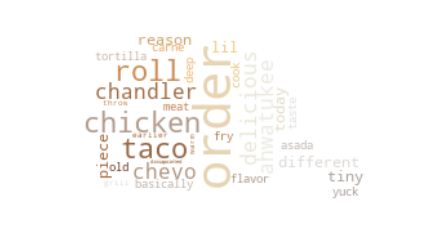

In [52]:
# Generate a word cloud image
mask = np.array(Image.open('drumstick.jpg'))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")